In [1]:
from matplotlib import pyplot as plt
import tensorflow as tf
#from tensorflow import keras
#Используем костыль для исправления IntelliSense для keras по гайду:
#https://stackoverflow.com/questions/71000250/import-tensorflow-keras-could-not-be-resolved-after-upgrading-to-tensorflow-2
import keras.api._v2.keras as keras
from keras import layers
from keras import losses
from keras.datasets import mnist
import numpy as np
from emnist import list_datasets

In [2]:
#print(list_datasets())

(x_train,y_train), (x_test,y_test)=mnist.load_data()

#from emnist import extract_training_samples
#x_train, y_train = extract_training_samples('digits')
#x_train, y_train = extract_training_samples('byclass')
#x_train, y_train = extract_training_samples('letters')

num_output_classes=10
input_shape = (28*28)

x_train=x_train.reshape(-1,28*28).astype('float32')/255.0
x_test=x_test.reshape(-1,28*28).astype('float32')/255.0

#x_train = np.expand_dims(x_train, -1)
#x_test = np.expand_dims(x_test, -1)

#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)

#x_train_l, y_train_l = extract_training_samples('letters')

print()


print("Train X=%s, y=%s"%(x_train.shape,y_train.shape))
#print("Train Letters X=%s, y=%s"%(x_train_l.shape,y_train_l.shape))
#print("Test X=%s, y=%s"%(x_test1.shape,y_test.shape))


print("Train X=%s, y=%s"%(x_train.shape,y_train.shape))
print("Test X=%s, y=%s"%(x_test.shape,y_test.shape))
print(x_test[0].shape)


Train X=(60000, 784), y=(60000,)
Train X=(60000, 784), y=(60000,)
Test X=(10000, 784), y=(10000,)
(784,)


In [22]:
model=keras.Sequential(
    [
        keras.Input(shape=input_shape),
        #layers.MaxPooling2D(pool_size=(2, 2)),
        #layers.Flatten(),
        #layers.Dropout(0.5),
        layers.BatchNormalizationV1(),
        layers.Dense(28*28,activation='relu'),
        layers.BatchNormalizationV1(),
        layers.Dense(512,activation='relu'),
        layers.BatchNormalizationV1(),
        layers.Dense(256,activation='relu'),
        layers.BatchNormalizationV1(),
        layers.Dense(128,activation='relu'),
        layers.Dense(num_output_classes),#Уже на выходе вероятности если from_logits
    ]#52 Буквы, 10 цифрф
 )
print(model.output_shape)
print(str(model.summary()))

(None, 10)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_3 (Batc  (None, 784)              3136      
 hNormalization)                                                 
                                                                 
 dense_19 (Dense)            (None, 784)               615440    
                                                                 
 batch_normalization_4 (Batc  (None, 784)              3136      
 hNormalization)                                                 
                                                                 
 dense_20 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_5 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                           

In [23]:

def Compile(model):
    model.compile(
        #SparseCategoricalCrossentropy - ужастно работает на EMnist. CategoricalCrossentropy + категории топчик.
        loss=losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.optimizers.Adam(lr=0.01),#Adam сходится быстрее, чем Adadelta
        metrics=['Accuracy']#В данной задаче лучше, чем CategoricalAccuracy
    )
Compile(model)

In [24]:
#model.fit(x_train,y_train,batch_size=1,epochs=5,shuffle=True)

In [25]:
print("x_train=",x_train.shape,"y_train",y_train.shape)
#Баг Tensorflow. Если выполнять сохранение, а потом обучать, то нейронка не может обучиться больше 10% и нужно заново скомпилировать, чтоб заработала
model.save("saved_model_MNIST_Dense/MNIST_learn_epoch_start.h5")
Compile(model)
for i in range(1,5):
    print("Epoch "+str(i))
    model.save('saved_model_MNIST_Dense/MNIST_learn_epoch_start='+str(i)+".h5")
    Compile(model)
    model.fit(x_train,y_train,batch_size=100,epochs=1,shuffle=True,validation_data=(x_test,y_test),verbose=1)
    
    
    model.save('saved_model_MNIST_Dense/MNIST_learn_epoch_end='+str(i)+".h5")
    
model.save("saved_model_MNIST_Dense/MNIST_learn_done.h5")

results=model.evaluate(x_test,y_test,batch_size=100,verbose=2)
print(str(results))

x_train= (60000, 784) y_train (60000,)
Epoch 1
600/600 [==============================] - 9s 13ms/step - loss: 0.2436 - Accuracy: 0.9294 - val_loss: 0.1157 - val_Accuracy: 0.9643
Epoch 2
600/600 [==============================] - 8s 12ms/step - loss: 0.1536 - Accuracy: 0.9572 - val_loss: 0.1410 - val_Accuracy: 0.9600
Epoch 3
600/600 [==============================] - 9s 13ms/step - loss: 0.1131 - Accuracy: 0.9693 - val_loss: 0.1141 - val_Accuracy: 0.9689
Epoch 4
600/600 [==============================] - 8s 13ms/step - loss: 0.0876 - Accuracy: 0.9757 - val_loss: 0.1027 - val_Accuracy: 0.9727
100/100 - 0s - loss: 0.1027 - Accuracy: 0.9727 - 401ms/epoch - 4ms/step
[0.10270968079566956, 0.9726999998092651]


In [26]:

def Compile(model):
    model.compile(
        #SparseCategoricalCrossentropy - ужастно работает на EMnist. CategoricalCrossentropy + категории топчик.
        loss=losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.optimizers.Adadelta(),
        metrics=['Accuracy']#В данной задаче лучше, чем CategoricalAccuracy
    )
Compile(model)

model.fit(x_train,y_train,batch_size=100,epochs=5,shuffle=True,validation_data=(x_test,y_test),verbose=1)

Epoch 1/5
600/600 [==============================] - 8s 12ms/step - loss: 0.0679 - Accuracy: 0.9797 - val_loss: 0.0899 - val_Accuracy: 0.9760
Epoch 2/5
600/600 [==============================] - 7s 11ms/step - loss: 0.0650 - Accuracy: 0.9810 - val_loss: 0.0903 - val_Accuracy: 0.9757
Epoch 3/5
600/600 [==============================] - 7s 12ms/step - loss: 0.0657 - Accuracy: 0.9804 - val_loss: 0.0899 - val_Accuracy: 0.9757
Epoch 4/5
600/600 [==============================] - 7s 11ms/step - loss: 0.0646 - Accuracy: 0.9805 - val_loss: 0.0901 - val_Accuracy: 0.9758
Epoch 5/5
600/600 [==============================] - 7s 12ms/step - loss: 0.0664 - Accuracy: 0.9802 - val_loss: 0.0894 - val_Accuracy: 0.9761


In [27]:
model.save("saved_model_MNIST_Dense/MNIST_learn_done2.h5")
results=model.evaluate(x_test,y_test,batch_size=100,verbose=2)
#model.fit(x_train,y_train,batch_size=32,epochs=5)

100/100 - 1s - loss: 0.0894 - Accuracy: 0.9761 - 598ms/epoch - 6ms/step


In [ ]:
#model.load_weights("saved_model3/EMNIST_learn_epoch_start.h5")

313/313 - 2s - loss: 0.0894 - Accuracy: 0.9761 - 2s/epoch - 6ms/step
[0.08937902748584747, 0.9761000275611877]
2832
(28, 28, 3)
(784,)
1/1 [==============================] - 0s 221ms/step
5


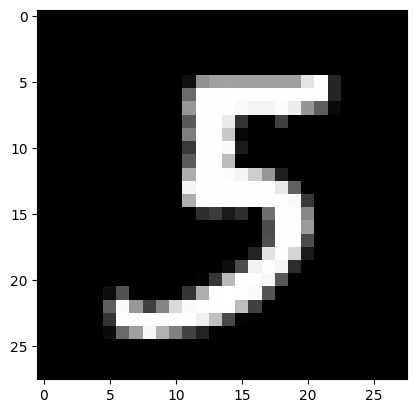

In [33]:
results=model.evaluate(x_test,y_test,batch_size=32,verbose=2)
print(str(results))
value=np.random.randint(0,10000)
print(value)
for id in range(len(y_train)):
    #print(labels[id])
    #break
    #22 - M big
    if(y_train.argmax()==7):
        value=id
        break
        


#print(x_train[value].shape)

single=x_test[value]
image=np.zeros((28,28,3))
print(image.shape)

for y in range(0,image.shape[0]):
    for x in range(0,image.shape[1]):
        for c in range(0,image.shape[2]):
            image[y][x][c]=single[y*28+x]



print(single.shape)
#print(single)

singleReady=np.zeros((1,28*28))

for y in range(0,image.shape[0]):
    for x in range(0,image.shape[1]):
            singleReady[0][y*28+x]=single[y*28+x]

print(model.predict(singleReady,batch_size=1).argmax())

plt.imshow(image)
plt.show()

In [ ]:
#model.save('saved_model_MNIST_Dense/MNIST_byclass_done.h5')

In [35]:
#results=model.evaluate(x_test,y_test,batch_size=32,verbose=2)
#print(str(results))
#value=np.random.randint(0,10000)

id=7
for v in y_train:
    if(v.argmax()==id):
        print(id)
        ShowImage(v)
        break
        #id+=1
currentIteration=0


def ShowImage(value:int):
    print(x_train[value].shape)

    single=x_train[value]
    image=np.zeros((28,28,3))
    print(image.shape)

    for y in range(0,image.shape[0]):
        for x in range(0,image.shape[1]):
            for c in range(0,image.shape[2]):
                image[y,x,c]=single[y*28+x]



    #print(single.shape)
    #print(single)

    #singleReady=np.zeros((1,28*28))

    #for y in range(0,image.shape[0]):
    #    for x in range(0,image.shape[1]):
    #            singleReady[0][y*28+x]=single[y*28+x]

    #print(model.predict(singleReady,batch_size=1).argmax())

    plt.imshow(image)
    plt.show()

In [156]:
from PIL import Image
path='../2022.10.21/0.png'
#path='Test/9.png'
#IMG = np.asarray(Image.open('../2022.10.21/2.png'))
IMG = np.asarray(Image.open(path))
#IMG = tf.keras.preprocessing.image.load_img(path)

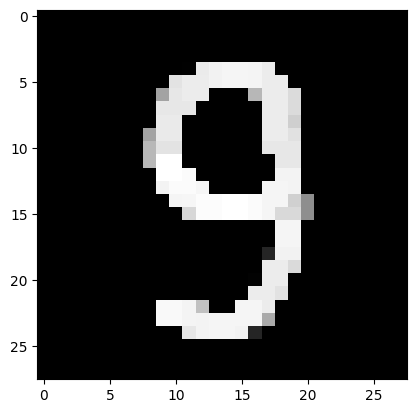

(28, 28, 3)


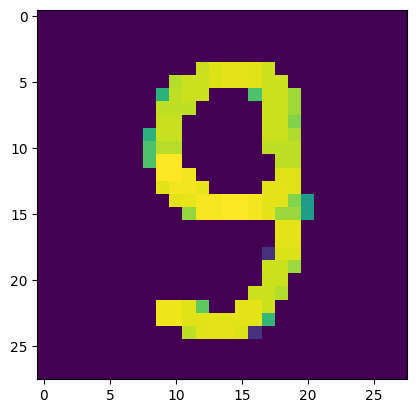

In [157]:
plt.imshow(IMG)
plt.show()
print(IMG.shape)

#IMG_2=np.zeros((1,28,28),dtype="float32")


#IMG_2=IMG.reshape(-1,28*28).astype("float32")/255.
IMG_2 = tf.keras.preprocessing.image.img_to_array(IMG)

OneChannelImage=np.zeros((28,28))

for y in range(28):
    for x in range(28):
        OneChannelImage[y][x]=IMG_2[y][x][0]

plt.imshow(OneChannelImage)
plt.show()

ReadyIMG=OneChannelImage.reshape(-1,28*28)/255.

#IMG_3 = np.array([IMG_2])
#IMG_2 = np.expand_dims(IMG_2, -1)
#print(IMG_2.shape)
#print(IMG_3.shape)

In [158]:
#print(model.predict(x_test[0],batch_size=1))
print(model.predict(ReadyIMG,batch_size=1).argmax())
#print(model.predict(IMG_2,batch_size=1).argmax())
#print(model.predict(np.zeros((1,28*28)),batch_size=1).argmax())

1/1 [==============================] - 0s 21ms/step
9
